## Madrid Property Analysis

#### 1) Exploratory Data Analysis
- In this step we will discover and visualize the data deeper to gain insights and check for correlations. 

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedShuffleSplit

/var/folders/zs/bkn_y8hx4sz7ql3x3_swz8mm0000gn/T/ipykernel_36583/1254213584.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('../data/split/stratified_train_set.csv')

In [3]:
df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_TamanoMedioDelHogar,dem_PropSinEstudiosUniversitarios,dem_PropSinEstudios,dem_Proporcion_de_nacidos_fuera_de_Espana,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),size_category
0,1.0,98.0,450000,-3.671471,40.394387,San Diego,Puente de Vallecas,1865,-0.2,-3.2,...,2.720731,0.620067,0.239921,45.884872,0.140012,43899,16135,40.553031,410.321496,2
1,4.0,134.0,275000,-3.768347,40.394239,Campamento,Latina,2185,2.7,-4.8,...,2.653121,0.560289,0.194524,29.846836,0.245186,19848,7481,45.669589,21.594146,3
2,3.0,98.0,99000,-3.704487,40.383182,Pradolongo,Usera,2006,0.3,-5.3,...,2.960683,0.612718,0.285851,47.817560,0.101431,17847,6028,42.117751,162.889293,2
3,5.0,133.0,750000,-3.705981,40.435092,Arapiles,Chamberí,4750,-2.6,-5.5,...,2.174839,0.354871,0.080247,19.353141,0.564883,24704,11359,46.008905,427.235060,3
4,0.0,91.0,410960,-3.670821,40.423862,Goya,Salamanca,5697,2.5,-1.3,...,2.249305,0.345274,0.062095,23.072299,0.592631,29945,13313,46.234380,388.747885,2


In [4]:
df.shape

(14285, 26)

Our dataset is now smaller, as expected as we have made the split and are currently only exploring the training dataset. We have alot of columns we can potentially explore and hence we will get started by visulaizing the geographical data that we have been provided. 

##### 1.1 Visualizing Geographical Data

Since we are provided with geographical information (latitude and longitude), we can already create a scatterplot of all values to visualize the data. Since the districts and neighborhoods are categorical values, we will take care of them later in the preprocessing. 

<Axes: xlabel='inm_longitude', ylabel='inm_latitude'>

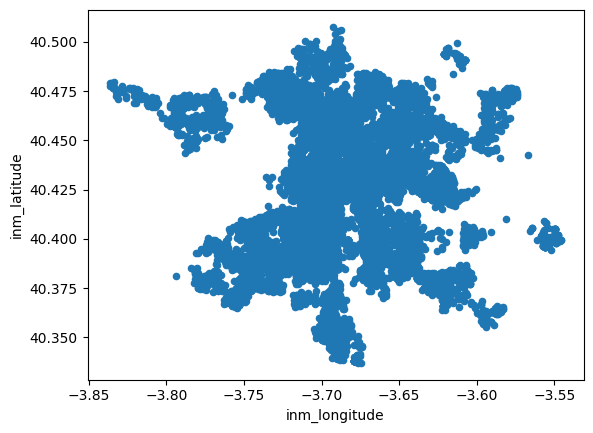

In [5]:
df.plot(kind="scatter", x="inm_longitude", y="inm_latitude")

This looks like the properties are distributed all over Madrid, but other than that it is hard to see any particular pattern, so we will adjust the alpha value. 

<Axes: xlabel='inm_longitude', ylabel='inm_latitude'>

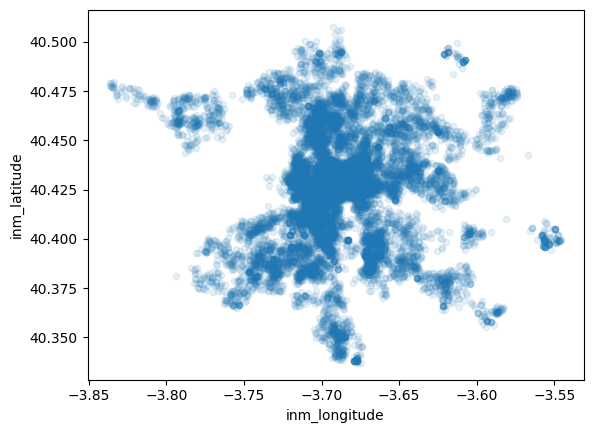

In [6]:
df.plot(kind="scatter", x="inm_longitude", y="inm_latitude", alpha=0.1)

Now we can clearly see the high-density areas, and judging by the density towards the center we can predict that the most density is in areas like Salamance which are in the center, to be more specific areas such as Alonso Martinez, Tribunal etc. 

<img src="../artifacts/map_overlay.png" alt="Map Overlay" width="750" height="350">

And after cross referencing with a map service, it is true, and from domain knowledge that does make sense. 

We can extend this exploration to the housing prices. We will make a plot which will include the location coordinates, population, and prices now to see if there's a pattern. The radius of each circle represents the area's population, and the color represents the price. We will use a predefined a color map that allows us to easily visualize the different colors. 

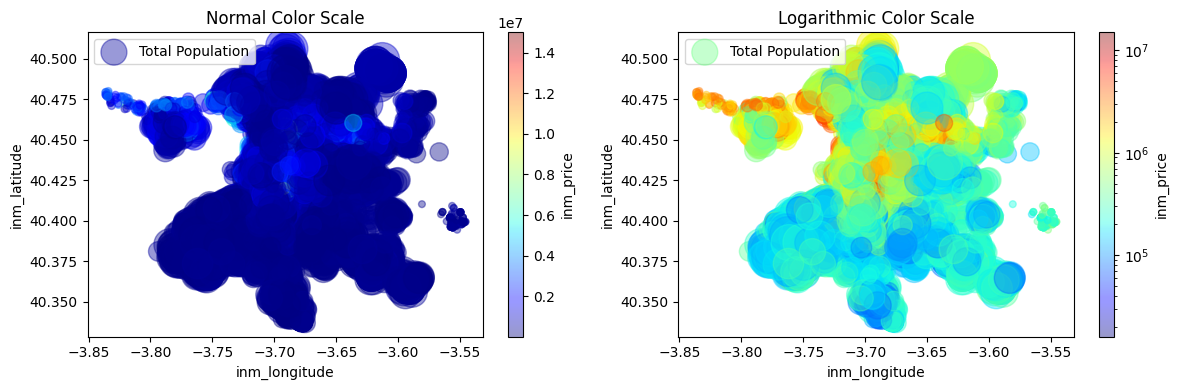

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Set up the matplotlib figure with two subplots, side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Normal color scale scatter plot on the left
df.plot(
    kind="scatter",
    x="inm_longitude",
    y="inm_latitude",
    alpha=0.4,
    s=df["dem_PobTotal"]/100,  # Size of points represent population
    label="Total Population",
    c="inm_price",  # Color of points represent price
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    ax=axes[0]  # This plot will be on the first subplot
)
axes[0].legend()
axes[0].set_title('Normal Color Scale')

# Logarithmic color scale scatter plot on the right
df.plot(
    kind="scatter",
    x="inm_longitude",
    y="inm_latitude",
    alpha=0.4,
    s=df["dem_PobTotal"]/100,  # Size of points represent population
    label="Total Population",
    c="inm_price",  # Color of points represent price
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    norm=LogNorm(),  # Apply a logarithmic scale to the color map
    ax=axes[1]  # This plot will be on the second subplot
)
axes[1].legend()
axes[1].set_title('Logarithmic Color Scale')

plt.tight_layout()  # Adjust the layout so the plots fit into the figure area well
plt.show()


We can see we have 2 outputs, one with the normal color scale, however, it's hard to identify the other colors with this representation. Hence I used a logarithmic color scale, as shown on the right, and we can see that it allows for better visualization of data when there are many low values and a few extremely high values. In this plot, the colors differentiate the data points more distinctly, showing the variation in 'imm_price' among locations that was not as apparent in the normal scale plot.

Looking at the logarithmic plot, we can observe areas with higher 'imm_price' values (warmer colors like red and yellow) and areas with lower values (cooler colors like blue and green). This suggests that there might be a trend or relationship between location (latitude and longitude) and the 'imm_price' variable.

In terms of a trend, the logarithmic plot suggests that there is a clustering of higher values in the center of the plot, which could suggest a trend where certain geographic locations are associated with higher or lower values of 'imm_price.'

##### 1.2 Categorical Features Exploration



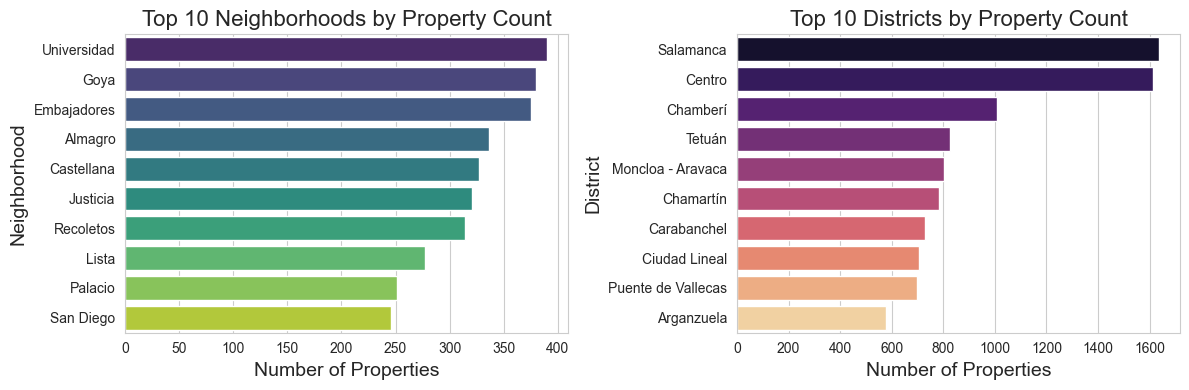

In [8]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Create a count plot for neighborhoods
sns.countplot(data=df, y='inm_barrio', order=df['inm_barrio'].value_counts().index[:10], palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 Neighborhoods by Property Count', fontsize=16)
axes[0].set_xlabel('Number of Properties', fontsize=14)
axes[0].set_ylabel('Neighborhood', fontsize=14)

# Create a count plot for districts
sns.countplot(data=df, y='inm_distrito', order=df['inm_distrito'].value_counts().index[:10], palette='magma', ax=axes[1])
axes[1].set_title('Top 10 Districts by Property Count', fontsize=16)
axes[1].set_xlabel('Number of Properties', fontsize=14)
axes[1].set_ylabel('District', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

We can see after plotting the top 10 neighborhoods and districts by property count, that we were actually right and our analysis with the latitude and longitude was true, as most as in the center. 

##### 1.3 Visualizing Property Data

Based on the previous visualization of the distributions of the numerical variables, we were able to see that the property related variables were very skewed and we will dive deeper by checking the density plots. 

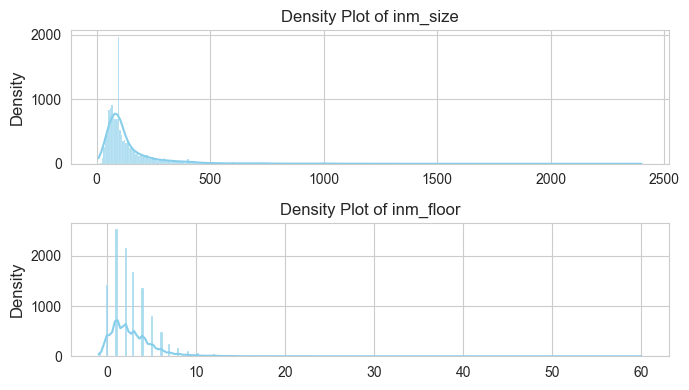

In [9]:
# Select numerical features for density plots
numerical_features = ['inm_size', 'inm_floor']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(7, 4), sharex=False)

# Iterate over numerical features and create density plots
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i], color='skyblue', alpha=0.7)
    axes[i].set_title(f'Density Plot of {feature}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

We can notice the following: 

Firstly, our stratified split was justified, as the size values are very skewed and without the stratified sampling, there would be a high chance to get bias data in the training or test set. So by doing stratified split, we took care of that. 

inm_size: The density plot for inm_size is heavily right-skewed, with a peak at the lower end of the size range. This indicates that the majority of the properties are small in size, and there are fewer large properties. There's a long tail extending to the right, suggesting there are outliers with very large sizes. So most of the houses are smaller in size, and we have some luxurious properties too towards the right. 

inm_floor: The inm_floor plot also shows a right-skewness, though not as pronounced as inm_size. Most properties are located on the lower floors, and there are fewer properties as the floor number increases. There are very few properties above floor 20, which might be outliers or represent high-rise buildings.

##### 1.4 Looking for Correlations

Since our dataset is not too large, we can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method, as it won't be very time consuming given our dataset size. We can view this in matrix heatmap form

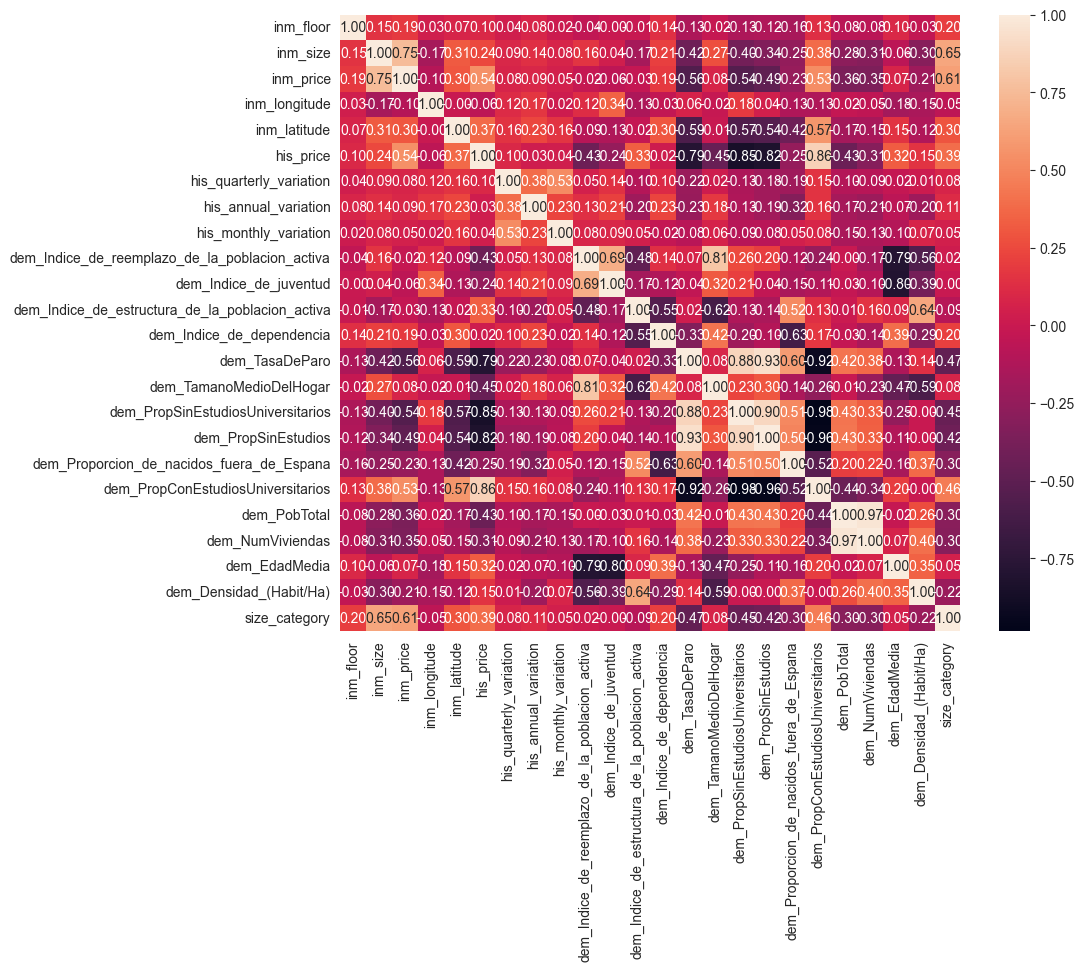

In [10]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns only
corr = numerical_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Now we can look at how much each attribute correlates with our target variable in specfic too.

In [11]:
corr["inm_price"].sort_values(ascending=False)

inm_price                                          1.000000
inm_size                                           0.754265
size_category                                      0.613816
his_price                                          0.544678
dem_PropConEstudiosUniversitarios                  0.532826
inm_latitude                                       0.301575
inm_floor                                          0.186551
dem_Indice_de_dependencia                          0.185792
his_annual_variation                               0.089830
dem_TamanoMedioDelHogar                            0.076538
his_quarterly_variation                            0.075234
dem_EdadMedia                                      0.073809
his_monthly_variation                              0.048731
dem_Indice_de_reemplazo_de_la_poblacion_activa    -0.018359
dem_Indice_de_estructura_de_la_poblacion_activa   -0.026008
dem_Indice_de_juventud                            -0.058008
inm_longitude                           

Based on the correlation heatmap and the sorted list of correlation coefficients we've done, it seems that some features have a low correlation with inm_price. However, we cannot just get rid of them, while low correlation might suggest that a feature has little linear relationship with the target variable, it does not necessarily mean that the feature is not important, as it may still be an important predictor in the context of other features. However, we can combine these results with our domain knowledge to make informed decisions too. 

#### 2) Feature Engineering
- In this step we will try to create some features that will help our model perform better from the data we have, and we will do some transformations and cleaning in the following steps. 
- A key thing we have to remember to do is to apply the same engineering to both test and train data set to maintain consistency across both datasets. 

In [12]:
test_df = pd.read_csv('../data/split/stratified_test_set.csv')

Firstly, we can start with the obvious features that we can do based on our data, and one straight of the bat is price per square meter. Typically this is a common metric used in the industry, so by using domain knowledge we can know this is important, and it is pretty simple to calculate. However, doing this introduces risk of data leakage as we are creating a feature with inherent information about the target variable, so we will not do this and instead focus on other features that we have. 

We can see that we have alot of demographic and historical data, so we can also definitely make use of this. Some of the features that come to mind are to create composite socioeconomic scores and educational attainment index. 


In [13]:
# Applying transformations to the training set

# Normalize the components to have a common scale
df['education_level_index'] = (df['dem_PropConEstudiosUniversitarios'] - df['dem_PropConEstudiosUniversitarios'].min()) / (df['dem_PropConEstudiosUniversitarios'].max() - df['dem_PropConEstudiosUniversitarios'].min())
# Assuming 'employment_rate' exists and is normalized similarly
df['household_size'] = (df['dem_TamanoMedioDelHogar'] - df['dem_TamanoMedioDelHogar'].min()) / (df['dem_TamanoMedioDelHogar'].max() - df['dem_TamanoMedioDelHogar'].min())
df['population_foreign'] = (df['dem_Proporcion_de_nacidos_fuera_de_Espana'] - df['dem_Proporcion_de_nacidos_fuera_de_Espana'].min()) / (df['dem_Proporcion_de_nacidos_fuera_de_Espana'].max() - df['dem_Proporcion_de_nacidos_fuera_de_Espana'].min())
# Composite score as an average of normalized components
df['composite_socioeconomic_score'] = df[['education_level_index', 'household_size', 'population_foreign']].mean(axis=1)


# Applying the same transformations to the test set
# Normalize the components to have a common scale
test_df['education_level_index'] = (test_df['dem_PropConEstudiosUniversitarios'] - test_df['dem_PropConEstudiosUniversitarios'].min()) / (test_df['dem_PropConEstudiosUniversitarios'].max() - test_df['dem_PropConEstudiosUniversitarios'].min())
# Assuming 'employment_rate' exists and is normalized similarly
test_df['household_size'] = (test_df['dem_TamanoMedioDelHogar'] - test_df['dem_TamanoMedioDelHogar'].min()) / (test_df['dem_TamanoMedioDelHogar'].max() - test_df['dem_TamanoMedioDelHogar'].min())
test_df['population_foreign'] = (test_df['dem_Proporcion_de_nacidos_fuera_de_Espana'] - test_df['dem_Proporcion_de_nacidos_fuera_de_Espana'].min()) / (test_df['dem_Proporcion_de_nacidos_fuera_de_Espana'].max() - test_df['dem_Proporcion_de_nacidos_fuera_de_Espana'].min())
# Composite score as an average of normalized components
test_df['composite_socioeconomic_score'] = test_df[['education_level_index', 'household_size', 'population_foreign']].mean(axis=1)

df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_PropConEstudiosUniversitarios,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),size_category,education_level_index,household_size,population_foreign,composite_socioeconomic_score
0,1.0,98.0,450000,-3.671471,40.394387,San Diego,Puente de Vallecas,1865,-0.2,-3.2,...,0.140012,43899,16135,40.553031,410.321496,2,0.107706,0.486618,0.833119,0.475815
1,4.0,134.0,275000,-3.768347,40.394239,Campamento,Latina,2185,2.7,-4.8,...,0.245186,19848,7481,45.669589,21.594146,3,0.275299,0.442448,0.471994,0.396581
2,3.0,98.0,99000,-3.704487,40.383182,Pradolongo,Usera,2006,0.3,-5.3,...,0.101431,17847,6028,42.117751,162.889293,2,0.046228,0.643380,0.876637,0.522082
3,5.0,133.0,750000,-3.705981,40.435092,Arapiles,Chamberí,4750,-2.6,-5.5,...,0.564883,24704,11359,46.008905,427.235060,3,0.784730,0.129984,0.235709,0.383474
4,0.0,91.0,410960,-3.670821,40.423862,Goya,Salamanca,5697,2.5,-1.3,...,0.592631,29945,13313,46.234380,388.747885,2,0.828945,0.178633,0.319453,0.442344


In [14]:
# Applying transformations to the training set
df['historical_trend_score'] = (df['his_price'] * 1 + 
                                  df['his_quarterly_variation'] * 2 + 
                                  df['his_monthly_variation'] * 3) / 6  # The denominator is the sum of the weights (1+2+3)

# Applying the same transformations to the test set
test_df['historical_trend_score'] = (test_df['his_price'] * 1 + 
                                  test_df['his_quarterly_variation'] * 2 + 
                                  test_df['his_monthly_variation'] * 3) / 6  # The denominator is the sum of the weights (1+2+3)

df.head()

,inm_floor,inm_size,inm_price,inm_longitude,inm_latitude,inm_barrio,inm_distrito,his_price,his_quarterly_variation,his_annual_variation,...,dem_PobTotal,dem_NumViviendas,dem_EdadMedia,dem_Densidad_(Habit/Ha),size_category,education_level_index,household_size,population_foreign,composite_socioeconomic_score,historical_trend_score
0,1.0,98.0,450000,-3.671471,40.394387,San Diego,Puente de Vallecas,1865,-0.2,-3.2,...,43899,16135,40.553031,410.321496,2,0.107706,0.486618,0.833119,0.475815,311.366667
1,4.0,134.0,275000,-3.768347,40.394239,Campamento,Latina,2185,2.7,-4.8,...,19848,7481,45.669589,21.594146,3,0.275299,0.442448,0.471994,0.396581,365.566667
2,3.0,98.0,99000,-3.704487,40.383182,Pradolongo,Usera,2006,0.3,-5.3,...,17847,6028,42.117751,162.889293,2,0.046228,0.643380,0.876637,0.522082,334.983333
3,5.0,133.0,750000,-3.705981,40.435092,Arapiles,Chamberí,4750,-2.6,-5.5,...,24704,11359,46.008905,427.235060,3,0.784730,0.129984,0.235709,0.383474,790.300000
4,0.0,91.0,410960,-3.670821,40.423862,Goya,Salamanca,5697,2.5,-1.3,...,29945,13313,46.234380,388.747885,2,0.828945,0.178633,0.319453,0.442344,950.833333


In [15]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns only
corr = numerical_df.corr()

# Generate a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, annot=True, fmt=".2f")
# plt.show()

corr["inm_price"].sort_values(ascending=False)

inm_price                                          1.000000
inm_size                                           0.754265
size_category                                      0.613816
historical_trend_score                             0.544824
his_price                                          0.544678
dem_PropConEstudiosUniversitarios                  0.532826
education_level_index                              0.532826
composite_socioeconomic_score                      0.398800
inm_latitude                                       0.301575
inm_floor                                          0.186551
dem_Indice_de_dependencia                          0.185792
his_annual_variation                               0.089830
household_size                                     0.076538
dem_TamanoMedioDelHogar                            0.076538
his_quarterly_variation                            0.075234
dem_EdadMedia                                      0.073809
his_monthly_variation                   

In the cells above, we made new features, including the historical_trend_score and education_level_index which seem to have a moderate positive linear relationship between the newly created features and the property prices, indicating this feature could be a valuable predictor in our model. Now in the next step, we will do processing on our data, and then make the models. 

In [16]:
df.to_csv('../data/split/stratified_train_set.csv', index=False)
test_df.to_csv('../data/split/stratified_test_set.csv', index=False)